In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline 

In [52]:
data=pd.read_csv("../data/house1/train.csv")
testx=pd.read_csv("../data/house1/test.csv")
testy=pd.read_csv("../data/house1/sample_submission.csv")
data.head()


POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

In [20]:
data.describe()

UNDER_CONSTRUCTION          RERA       BHK_NO.     SQUARE_FT  \
count        29451.000000  29451.000000  29451.000000  2.945100e+04   
mean             0.179756      0.317918      2.392279  1.980217e+04   
std              0.383991      0.465675      0.879091  1.901335e+06   
min              0.000000      0.000000      1.000000  3.000000e+00   
25%              0.000000      0.000000      2.000000  9.000211e+02   
50%              0.000000      0.000000      2.000000  1.175057e+03   
75%              0.000000      1.000000      3.000000  1.550688e+03   
max              1.000000      1.000000     20.000000  2.545455e+08   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE  \
count   29451.000000  29451.000000  29451.000000  29451.000000   
mean        0.820244      0.929578     21.300255     76.837695   
std         0.383991      0.255861      6.205306     10.557747   
min         0.000000      0.000000    -37.713008   -121.761248   
25%         1.000000      1.000000     18.452663     73.798100   
50%         1.000000      1.000000     20.750000     77.324137   
75%         1.000000      1.000000     26.900926     77.828740   
max         1.000000      1.000000     59.912884    152.962676   

       TARGET(PRICE_IN_LACS)  
count           29451.000000  
mean              142.898746  
std               656.880713  
min                 0.250000  
25%                38.000000  
50%                62.000000  
75%               100.000000  
max             30000.000000

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [25]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

<AxesSubplot:>

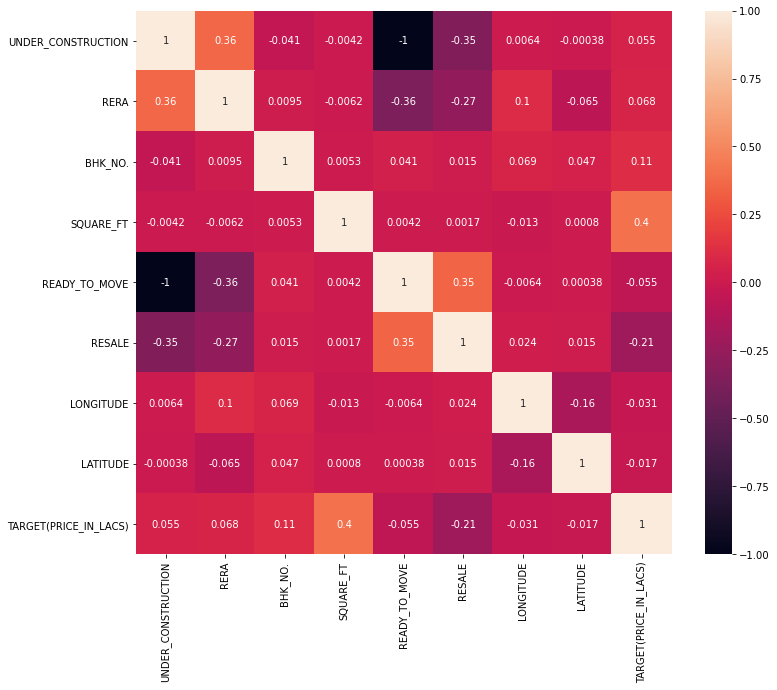

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [33]:
fig = px.histogram(data, x="TARGET(PRICE_IN_LACS)",marginal="rug")
fig.show()


In [35]:
fig = px.bar(x=data["BHK_NO."].unique(), y=data["BHK_NO."].value_counts())
fig.show()

In [3]:
import folium
from folium import Choropleth, Circle, Marker


In [4]:
map = folium.Map(location=[22.00,78.00], tiles='cartodbpositron', zoom_start=6)
for i in range(0,len(data)):
    Circle(
        location=[data.iloc[i]['LONGITUDE'], data.iloc[i]['LATITUDE']],
        radius=100,
        color='green').add_to(map)

# Display the map
map

NameError: name 'data' is not defined

In [87]:
x_train = data.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)'], axis=1)
y_train = data['TARGET(PRICE_IN_LACS)']

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [46]:
x_train

UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  RESALE
0                       0     0        2  1300.236407              1       1
1                       0     0        2  1275.000000              1       1
2                       0     0        2   933.159722              1       1
3                       0     1        2   929.921143              1       1
4                       1     0        2   999.009247              0       1
...                   ...   ...      ...          ...            ...     ...
29446                   0     0        3  2500.000000              1       1
29447                   0     0        2   769.230769              1       1
29448                   0     0        2  1022.641509              1       1
29449                   0     0        2   927.079009              1       1
29450                   0     1        2   896.774194              1       1

[29451 rows x 6 columns]

In [47]:
y_train

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [48]:
lm.fit(x_train, y_train)


LinearRegression()

In [49]:
print(lm.intercept_)

424.6069144314843


In [50]:
lm.coef_
pd.DataFrame(lm.coef_, x_train.columns, columns=['Coeff'])

Coeff
UNDER_CONSTRUCTION  -15.804951
RERA                 26.423302
BHK_NO.              83.909795
SQUARE_FT             0.000139
READY_TO_MOVE        15.804951
RESALE             -541.881072

In [54]:
xtest = testx.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE'], axis=1)

In [55]:
predictions = lm.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error

In [58]:
print(mean_squared_error(testy,predictions))

43011.850107425686


In [62]:
print(pd.DataFrame(predictions).to_csv('submission.csv'))

None
